In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import shap

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error, mean_squared_error, r2_score, root_mean_squared_error
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df.drop(['salary','salary_currency'],inplace=True,axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [5]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0
company_size,0


In [4]:
def seg_job_title(job_title):
    data_scientist_titles = ['Principal Data Scientist', 'Data Scientist', 'Applied Scientist', 'Research Scientist', 'Applied Data Scientist', 'Lead Data Scientist', 'Staff Data Scientist', 'Principal Data Analyst', 'Principal Data Engineer']
    machine_learning_titles = ['ML Engineer', 'Machine Learning Engineer', 'Applied Machine Learning Engineer', 'Machine Learning Researcher', 'Machine Learning Scientist', 'Autonomous Vehicle Technician', 'Applied Machine Learning Scientist', 'Principal Machine Learning Engineer', 'Machine Learning Developer', 'Lead Machine Learning Engineer', 'Machine Learning Manager']
    data_analyst_titles = ['Data Analyst', 'Data Quality Analyst', 'Compliance Data Analyst', 'Business Data Analyst', 'Staff Data Analyst', 'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst', 'Finance Data Analyst']
    data_engineer_titles = ['Data Modeler', 'Data Engineer', 'ETL Engineer', 'Data DevOps Engineer', 'Big Data Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer', 'Cloud Database Engineer', 'Cloud Data Engineer', 'Cloud Data Architect', 'Lead Data Engineer', 'Principal Data Engineer']
    bi_analytics_titles = ['Data Analytics Manager', 'Business Intelligence Engineer', 'Analytics Engineer', 'BI Data Engineer', 'Director of Data Science', 'BI Developer', 'Insight Analyst', 'Data Analytics Specialist', 'Data Analytics Lead', 'Power BI Developer', 'Cloud Data Architect']
    other_titles = ['Data Strategist', 'Computer Vision Engineer', 'AI Developer', 'Head of Data']

    if job_title in data_scientist_titles:
        return 'Data Scientist'
    elif job_title in machine_learning_titles:
        return 'Machine Learning Engineer'
    elif job_title in data_analyst_titles:
        return 'Data Analyst'
    elif job_title in data_engineer_titles:
        return 'Data Engineer'
    elif job_title in bi_analytics_titles:
        return 'BI Analyst'
    elif job_title in other_titles:
        return 'Other'
    else:
        return 'Uncategorized'

In [5]:
df['job_title'] = df['job_title'].apply(seg_job_title)

<Axes: xlabel='job_title'>

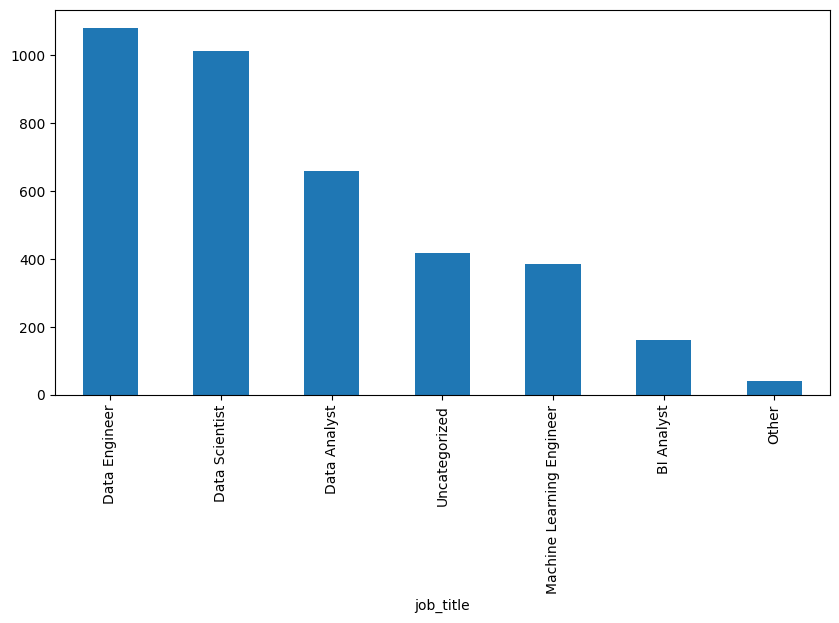

In [6]:
plt.figure(figsize=(10,5))
df['job_title'].value_counts().plot(kind='bar')

In [7]:
def categorize_region(country):
    if country in ['DE', 'GB', 'PT', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'AT', 'SG', 'SE', 'SI', 'UZ', 'HR', 'PL', 'CY', 'AM', 'BA', 'GR', 'MK', 'LV', 'RO', 'IT', 'MA', 'LT', 'BE', 'AS', 'HU', 'SK', 'CZ', 'JE', 'RS', 'MD', 'LU', 'MT']:
        return 'Europe'
    elif country in ['US', 'CA', 'MX']:
        return 'North America'
    elif country in ['BR', 'AR', 'CL', 'BO', 'CR', 'DO', 'PR', 'HN', 'UY']:
        return 'South America'
    elif country in ['NG', 'GH', 'KE', 'TN', 'DZ']:
        return 'Africa'
    elif country in ['HK', 'IN', 'CN', 'JP', 'KR', 'BD', 'VN', 'PH', 'MY', 'ID', 'AE']:
        return 'Asia'
    elif country in ['AU', 'NZ']:
        return 'Oceania'
    else:
        return 'Unknown'

In [8]:
df['employee_residence'] = df['employee_residence'].apply(categorize_region)

In [9]:
def categorize_region(country):
    if country in ['DE', 'GB', 'PT', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'AT', 'SG', 'SE', 'SI', 'UZ', 'HR', 'PL', 'CY', 'AM', 'BA', 'GR', 'MK', 'LV', 'RO', 'IT', 'MA', 'LT', 'BE', 'AS', 'HU', 'SK', 'CZ', 'JE', 'RS', 'MD', 'LU', 'MT']:
        return 'Europe'
    elif country in ['US', 'CA', 'MX']:
        return 'North America'
    elif country in ['BR', 'AR', 'CL', 'BO', 'CR', 'DO', 'PR', 'HN', 'UY']:
        return 'South America'
    elif country in ['NG', 'GH', 'KE', 'TN', 'DZ']:
        return 'Africa'
    elif country in ['HK', 'IN', 'CN', 'JP', 'KR', 'BD', 'VN', 'PH', 'MY', 'ID', 'AE']:
        return 'Asia'
    elif country in ['AU', 'NZ']:
        return 'Oceania'
    else:
        return 'Unknown'

df['company_location'] = df['company_location'].apply(categorize_region)

<Axes: xlabel='company_location'>

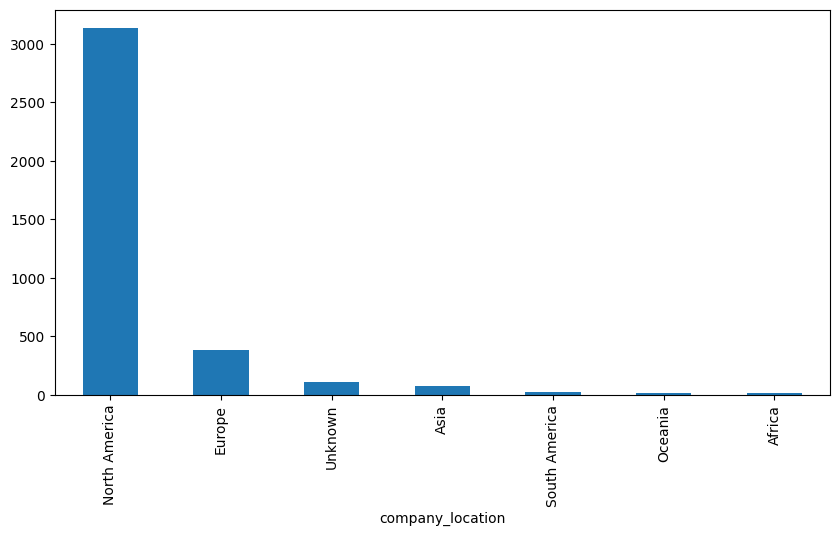

In [10]:
plt.figure(figsize=(10,5))
df['company_location'].value_counts().plot(kind='bar')

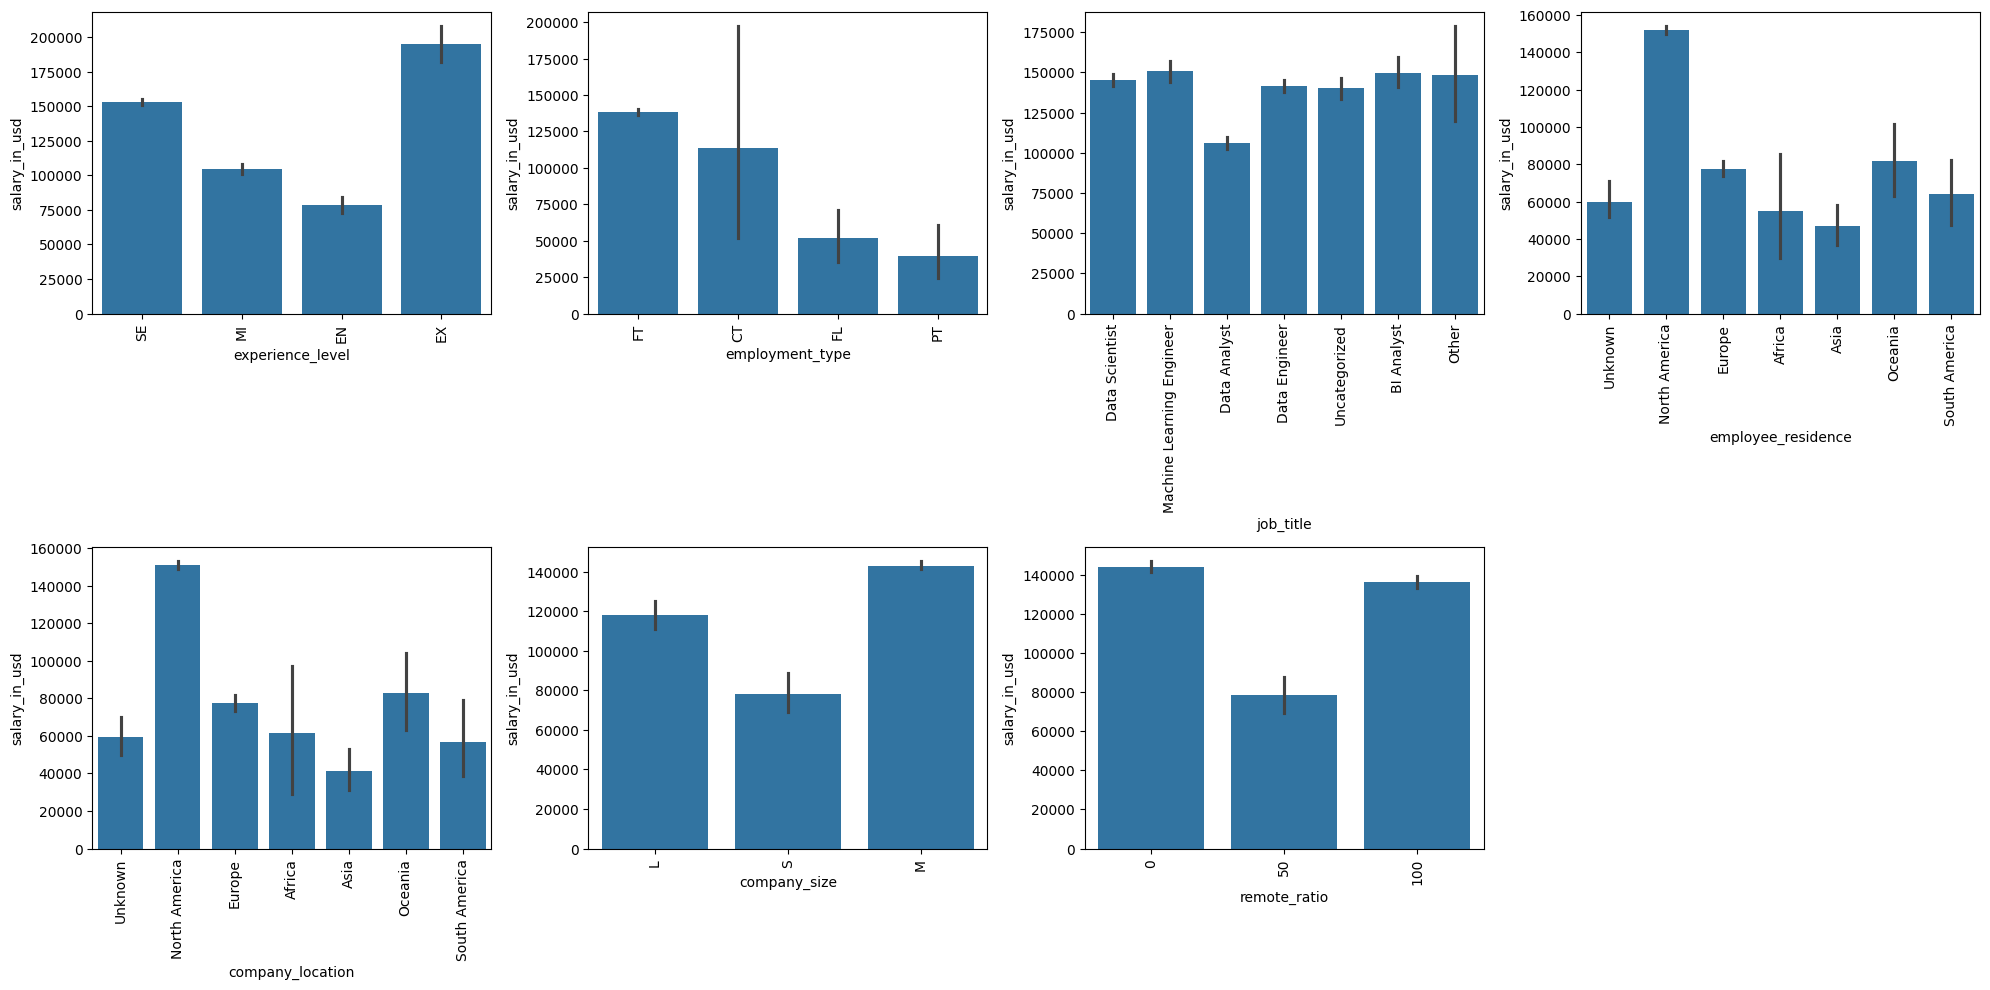

In [12]:
cat_vars = ['experience_level', 'employment_type', 'job_title', 'employee_residence',
            'company_location', 'company_size', 'remote_ratio']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.barplot(data=df, x=var, y = 'salary_in_usd', ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.delaxes(axs[7])

fig.tight_layout()
plt.show()


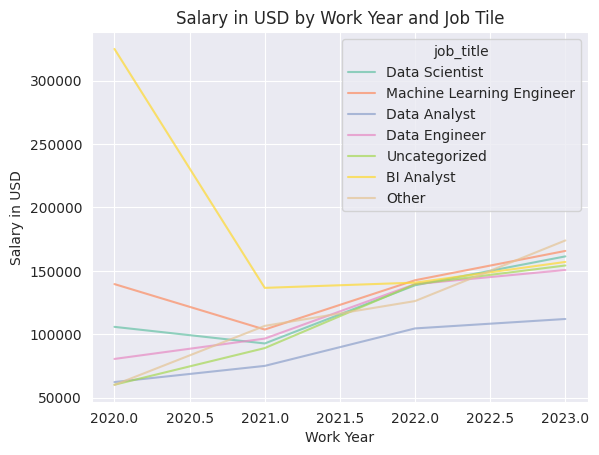

In [14]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='work_year', y = 'salary_in_usd', hue = 'job_title', data = df, estimator='mean', ci=None, alpha=0.7)

plt.title("Salary in USD by Work Year and Job Tile")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")

plt.show()

In [16]:
for col in df.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  print(f"{col}: {df[col].unique()}")

experience_level: [3 2 0 1]
employment_type: [2 0 1 3]
job_title: [3 4 1 2 6 0 5]
employee_residence: [6 3 2 0 1 4 5]
company_location: [6 3 2 0 1 4 5]
company_size: [0 2 1]


In [17]:
x = df.drop('salary_in_usd',axis=1)
y = df['salary_in_usd']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
dt = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10}


In [23]:
dt = DecisionTreeRegressor(max_depth=20, max_features='log2', min_samples_leaf=5, min_samples_split=10)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
mae = mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(mae,mse,r2,rmse)

0.4163666346157968 2634541077.83318 0.3326541716628406 51327.78076084315


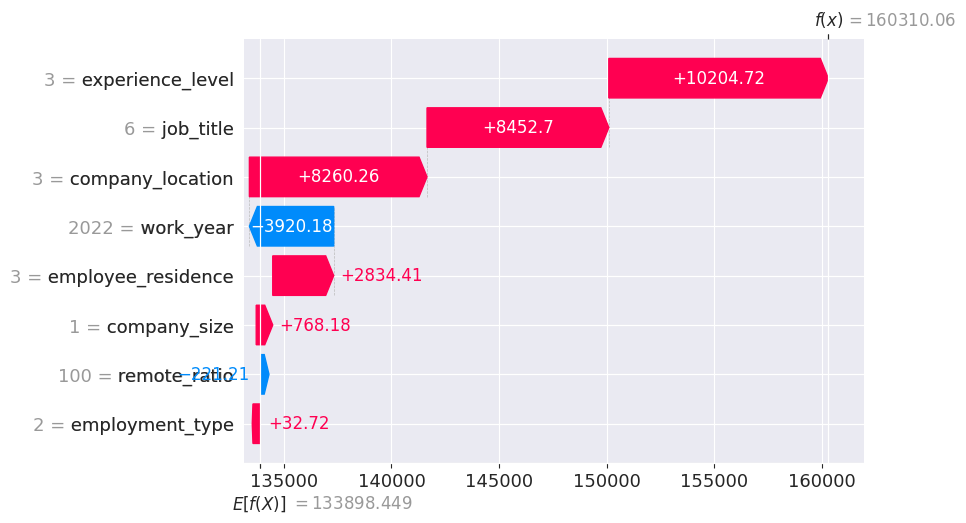

In [24]:
explainer = shap.Explainer(dt, x_test)
shap_values = explainer(x_test)
shap.plots.waterfall(shap_values[0])

In [26]:
rf = RandomForestRegressor()

param_grid = {
    'max_depth': [3,5,7,9],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,5,10],
    'max_features':['sqrt','log2'],
    'n_estimators':[50,100,150]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}


In [29]:
rf = RandomForestRegressor(max_depth = 9, max_features='log2', min_samples_leaf= 5, min_samples_split=10, n_estimators= 150,random_state=42)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
mae = mean_absolute_percentage_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.40619559411953365
MAPE is 0.40619559411953365
MSE is 2445484442.2422757
R2 score is 0.38054340677198384
RMSE score is 49451.83962444952


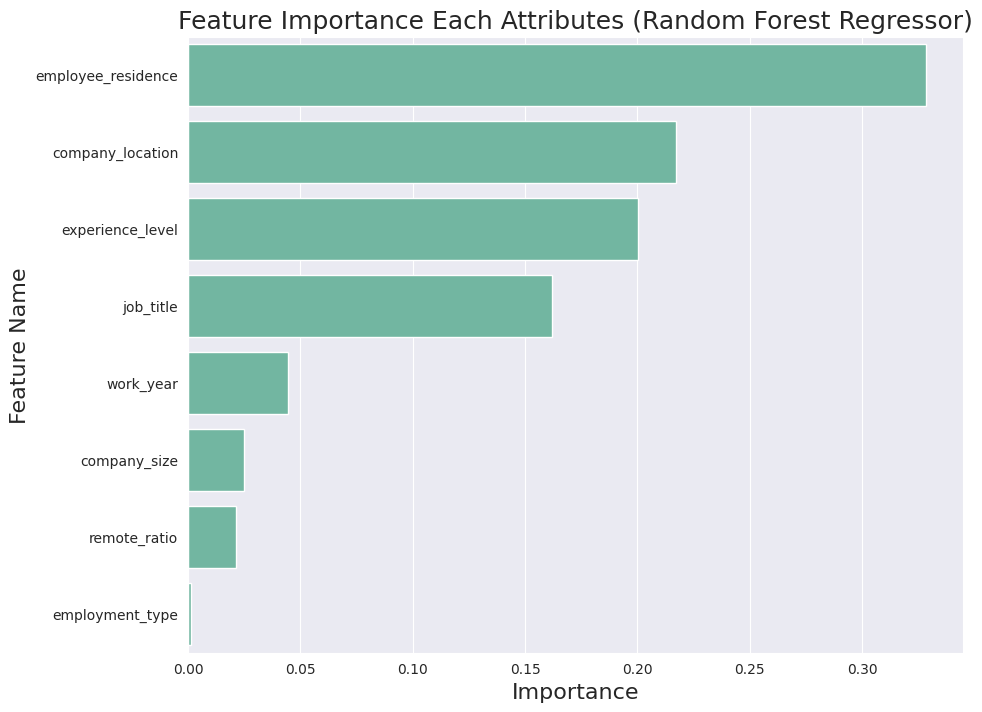

In [31]:
imp_feat = rf.feature_importances_
fi = pd.DataFrame({'Feature Name': x_train.columns, 'Importance': imp_feat})

fi = fi.sort_values(by='Importance', ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

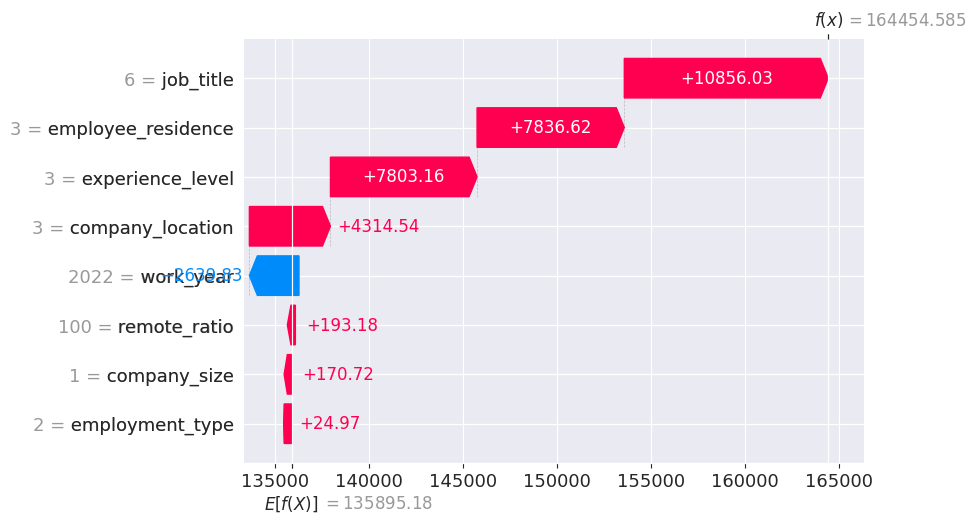

In [34]:
explainer = shap.Explainer(rf, x_test)
shap_values = explainer(x_test)
shap.plots.waterfall(shap_values[0])